In [1]:
%matplotlib inline

import io, os, sys, types, datetime, pickle, warnings

warnings.filterwarnings('ignore')

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

import numpy as np
from numpy.linalg import eig, inv

import math

from scipy import interpolate, spatial, stats

import seaborn as sns

import skimage.io as skiIo
from skimage import exposure, img_as_float, filters, morphology, transform

from sklearn import linear_model
from sklearn import metrics

In [2]:
""" ============== path settings =============="""

' ============== path settings =============='

In [3]:
# global isMac
# isMac = True

# if(isMac):
# #     dataPrefix = '/Users/lily/Lily/Academic/AW_Lab/data/fate_switching_gal80/Summary/Data'
#     imageDataPrefix = '/Users/lily/Lily/Academic/AW_Lab/data/fate_switching_gal80/Summary/Data'
#     figOutPrefix = '/Users/lily/Lily/Academic/AW_Lab/data/fate_switching_gal80/Summary/FigureOutput1'
#     dataOutPrefix = '/Users/lily/Lily/Academic/AW_Lab/data/fate_switching_gal80/Summary/DataOutput_v0812/Selected'
#     module_path = '/Volumes/Project/2015_07_Neural_Superposition/Projects/Weiyue/Code/python_cluster/helper_functions'
# else:
# #     sys.path.insert(0, 'Z:\\lab\\Projects\\NSP\\NSP_Code\\python\\Quantification_fromPositionOnly\\Functions')
#     dataPrefix = 'W:\\2015_07_Neural_Superposition\\Projects\\Weiyue\\Data_Analysis\\Fate_Switching_experiments\\Data_Gal80'
#     imageDataPrefix = dataPrefix
#     figOutPrefix = 'W:\\2015_07_Neural_Superposition\\Projects\\Weiyue\\Data_Analysis\\Fate_Switching_experiments\\Output_Gal80\\DataOutput_temp'
#     dataOutPrefix = 'W:\\2015_07_Neural_Superposition\\Projects\\Weiyue\\Data_Analysis\\Fate_Switching_experiments\\Output_Gal80\\FigureOutput_temp'
#     module_path = 'W:\\2015_07_Neural_Superposition\\Projects\\Weiyue\\Code\\python_cluster\\helper_functions'
# #     dataPrefix = 'D:\\WEIYUE\\Data_Analysis\\Summary\\Data'
# #     figOutPrefix = ''
# #     dataOutPrefix = 'D:\\WEIYUE\\Data_Analysis\\Summary\\DataOutput'
# data_prefix = os.path.join(sup_prefix, 'Data_Gal80')
# fig_out_prefix = os.path.join(sup_prefix, 'Output_Gal80', 'FigureOutput_v3')
# data_out_prefix = os.path.join(sup_prefix, 'Output_Gal80', 'DataOutput_v3')


In [27]:
global isMac
isMac = True

if(isMac):
    sup_prefix = '/Volumes/Project/2015_07_Neural_Superposition/Projects/Weiyue/Data_Analysis/Fate_Switching_experiments'
    module_path = '/Volumes/Project/2015_07_Neural_Superposition/Projects/Weiyue/Code/python_cluster/helper_functions'
    image_data_prefix = '/Users/lily/Lily/Academic/AW_Lab/data/fate_switching_gal80/Summary/Data'
else:
    sup_prefix = 'W:\\2015_07_Neural_Superposition\\Projects\\Weiyue\\Data_Analysis\\Fate_Switching_experiments'
    module_path = 'W:\\2015_07_Neural_Superposition\\Projects\\Weiyue\\Code\\python_cluster\\helper_functions\\'
    sum_fig_out_prefix = 'C:\\Users\\sf942274\\Desktop\\Figures'

data_prefix = os.path.join(sup_prefix, 'Data_Gal80')
fig_out_prefix = os.path.join(sup_prefix, 'Output_Gal80', 'FigureOutput_trial')
data_out_prefix = os.path.join(sup_prefix, 'Output_Gal80', 'DataOutput_v0812')

In [20]:
### import custom functions
if module_path not in sys.path:
    sys.path.append(module_path)
import Data_quantification_function_helper as my_help
import Data_quantification_function_intensity_calculation as my_int
import Data_quantification_function_parse_bundle as my_pb
import Data_quantification_function_plotting as my_plot


In [21]:
### analysis parameters
slicetype = 0
centertype = 1
radius_expanse_ratio = [2.5, 3]
num_angle_ection = 24
num_outside_angle = 18
num_x_section = 40
z_offset = 20
analysis_params = [num_angle_ection, num_outside_angle, num_x_section, z_offset, radius_expanse_ratio]

In [22]:
target_index_match = {0:0, 1:2, 2:3, 3:4, 4:5, 5:7}
target_index_match_rev = {0:0, 2:1, 3:2, 4:3, 5:4, 7:5}
color_code = {1:'#00FFFF', 2:'#1FF509', 3: '#FF0000', 4: '#CFCF1C', 5: '#FF00FF', 6: '#FFAE01', 7:'#ff7c80', 0:'#FFFFFF'}
channel_mapping = {'RFP':0, 'GFP':1, 'R3_1':2, 'R4_1':3, 'R3_2':4, 'R4_2':5, 'R3_3': 6, 0:'RFP', 1:'GFP', 2:'R3_1', 3:'R4_1', 4:'R3_2', 5:'R4_2', 6:'R3_3'}
channel_cmap = {0:'Reds', 1: 'Greens', 2:'Reds', 3: 'Greens', 4:'Reds', 5: 'Greens', 6:'Reds'}
matching_info = (target_index_match, color_code, channel_mapping, channel_cmap, target_index_match_rev)

In [23]:
### file parameters
# file folders
image_folder = 'Images'
ROI_folder = 'ROIs'
annotation_folder = 'Annotations'
summary_folder = 'Summary'


# load summary statistics file
mypath = os.path.join(data_prefix, summary_folder)
sum_df = pd.read_csv(os.path.join(mypath, 'summary.csv'))

In [24]:
"""============== main =============="""

'============== main =============='

In [25]:
# load annotation files
mypath = os.path.join(data_prefix, annotation_folder)
folders, files = my_help.parseFolderInfo(mypath)
for filename in files:
    print(filename)
    if('.csv' in filename):
        df_temp = pd.read_csv(os.path.join(mypath, filename))
        if(files.index(filename) == 0):
            annots_df = df_temp
        else:
            df_temp = pd.read_csv(os.path.join(mypath, filename))
            annots_df = annots_df.append(df_temp, ignore_index=True, sort=True)
#     print(df_temp)

._Fz_Gal80_s24r1_summary.csv
Fz_Gal80_s26r1_summary.csv
Fz_Gal80_s23r1_summary.csv
Nic_Gal80_s12r1_summary.csv
Nic_Gal80_s9r1_summary.csv
Fz_Gal80_s24r1_summary.csv
Nic_Gal80_s2r1_summary.csv
Fz_Gal80_s2r1_summary.csv
._Fz_Gal80_s2r1_summary.csv
._Fz_Gal80_s1r1_summary.csv
._Nic_Gal80_s2r1_summary.csv
._Nic_Gal80_s9r1_summary.csv
Nic_Gal80_s8r1_summary.csv
Fz_Gal80_s9r1_summary.csv
Fz_Gal80_s1r1_summary.csv


In [28]:
# load data files
outputData = {}
filepaths = my_help.getFilePaths(os.path.join(data_out_prefix, 'Selected'))
for i in range(len(filepaths)):
    print(f'====={i}=====')
    pickle_in = open(filepaths[i],"rb")
    outputData[i] = pickle.load(pickle_in)
    category = outputData[i]['categoryID']
    sampleID = outputData[i]['sampleID']
    regionID = outputData[i]['regionID']
    print(category, sampleID, regionID)

=====0=====
N 2 1
=====1=====
Fz 2 1
=====2=====
Fz 24 1
=====3=====
N 8 1
=====4=====
N 12 1
=====5=====
N 9 1
=====6=====
Fz 23 1
=====7=====
Fz 9 1
=====8=====
Fz 26 1
=====9=====
Fz 1 1


In [30]:
annots_df_group = annots_df.groupby(['CategoryID', 'SampleID', 'RegionID'])

In [61]:
outputData[iData].keys()

dict_keys(['categoryID', 'sampleID', 'regionID', 'sliceType', 'centerType', 'intensityMatrix', 'parameter', 'relativePositions'])

In [50]:
# for iData in outputData.keys():
iData = 0
category = outputData[iData]['categoryID']
sampleID = outputData[iData]['sampleID']
regionID = outputData[iData]['regionID']
annots_df_current = annots_df_group.get_group((category, sampleID, regionID))
annots_df_current.loc[:,'Bundle_No'] = annots_df_current.loc[:,'Bundle_No'].values.astype(int)
annots_df_current.reset_index(inplace = True)
image_list = annots_df_current.loc[:,'Image_Name'].unique()
ROI_list = annots_df_current.loc[:,'ROI_Name'].unique()

i_image = 0

In [66]:
intensity_matrix = outputData[iData]['intensityMatrix']
params = outputData[iData]['parameter']
rel_points = outputData[iData]['relativePositions']

In [52]:
### load other data
image_name = image_list[i_image]
ROI_name = ROI_list[i_image]
ROI_df = pd.read_csv(os.path.join(dataPrefix, ROI_folder, ROI_name))
ROI_df.rename(columns = {' ':'No'}, inplace = True)
# annot_df = summary_df.groupby(['Image_Name']).get_group(image_list[i_image]).reset_index(drop = True)

In [43]:
%time image = img_as_float(skiIo.imread(os.path.join(imageDataPrefix, image_folder, image_name)))
nChannels = min(image.shape)
if(nChannels == 2):
    image_shape = (image.shape[0], image.shape[2], image.shape[3])
else:
    image_shape = (image.shape[0], image.shape[1], image.shape[2])
M2P_ratio = (annots_df_current.iloc[0]['imgX_pixel']/annots_df_current.iloc[0]['imgX_um'], annots_df_current.iloc[0]['imgY_pixel']/annots_df_current.iloc[0]['imgY_um'])

CPU times: user 1.51 s, sys: 2.94 s, total: 4.46 s
Wall time: 4.61 s


In [55]:
isExtendedTargetList = False
annotation_type = annots_df_current.iloc[0]['Annotation_type']
if(annotation_type == 1):
    bundles_df = my_pb.getBundlesInfo_v1(ROI_df, annots_df_current, M2P_ratio[0], M2P_ratio[1], isExtendedTargetList)
elif(annotation_type == 2):
    bundles_df = my_pb.getBundlesInfo_v2(ROI_df, annots_df_current, M2P_ratio[0], M2P_ratio[1], isExtendedTargetList)
annot_bundles_df = bundles_df.dropna(axis=0, how='any', inplace = False)
annot_bundles_df.sort_index(inplace = True)

---df_annot---
1
2
12
11
17
22
25
29
35


In [57]:
""" Process images """
### number of channels
nChannels = min(image.shape)# number of channels of original image
num_norm_channels = len(channel_cmap.keys()) # number of channels of normalized image

if(nChannels == 2):
    print("2 channels!")
    ### normalize channels
    image_norm = np.empty(image_shape + (num_norm_channels,), dtype=image[:,0,:,:].dtype, order='C')
    thr = np.zeros((2))
    
    # RFP_norm
    %time image_norm[:,:,:,0] = exposure.rescale_intensity(image[:,0,:,:], in_range = 'image', out_range='dtype')
    # GFP_norm
    %time image_norm[:,:,:,1] = exposure.rescale_intensity(image[:,1,:,:], in_range = 'image', out_range='dtype')    
    
    del image
    
#     print("gfp threshold!")
#     %time thr[0] = filters.threshold_isodata(image_norm[:,:,:,1])
#     %time thr[1] = filters.threshold_mean(image_norm[:,:,:,1])

#     print("histogram matching!")
#     %time gfp = transform.match_histograms(image_norm[:,:,:,1], image_norm[:,:,:,0])
#     R3 = image_norm[:,:,:,0] - gfp
#     R3[R3<0] = 0
#     %time image_norm[:,:,:,2] = exposure.rescale_intensity(R3, in_range = 'image', out_range='dtype')
#     R4 = image_norm[:,:,:,0] * gfp
#     %time image_norm[:,:,:,3] = exposure.rescale_intensity(R4, in_range = 'image', out_range='dtype')
    
#     gfp_thr = morphology.binary_opening((image_norm[:,:,:,1]>thr[0])*1)
#     %time image_norm[:,:,:,4] = exposure.rescale_intensity(image_norm[:,:,:,0] * (1-gfp_thr), in_range = 'image', out_range='dtype')
#     %time image_norm[:,:,:,5] = exposure.rescale_intensity(morphology.closing(image_norm[:,:,:,1]*((image_norm[:,:,:,1]>((thr[0] + thr[1])/2))*1)))

#     del R3, R4, gfp, gfp_thr
    
# if(nChannels == 3):
#     print("3 channels!")
#     ### Seperate channels
#     GFP = image[:,:,:,1]
#     RFP = image[:,:,:,0]
#     Cy5 = image[:,:,:,2]

#     ### normalize GFP & RFP channel
#     image_norm = np.empty(image_shape + (num_norm_channels,), dtype=GFP.dtype, order='C')
    
# #     %time GFP_norm = exposure.equalize_adapthist(GFP)
#     %time GFP_norm = exposure.rescale_intensity(GFP, in_range = 'image', out_range='dtype')
    
# #     %time RFP_norm = exposure.equalize_adapthist(RFP)
#     %time RFP_norm = exposure.rescale_intensity(RFP, in_range = 'image', out_range='dtype')
    
# #     %time Cy5_norm = exposure.equalize_adapthist(GFP)
#     %time Cy5_norm = exposure.rescale_intensity(Cy5, in_range = 'image', out_range='dtype')
    
#     image_norm[:,:,:,0] = RFP_norm
#     image_norm[:,:,:,1] = GFP_norm
#     image_norm[:,:,:,4] = Cy5_norm

#     R3 = RFP_norm - GFP_norm
#     R3[R3<0] = 0
# #     %time R3_norm = exposure.equalize_adapthist(R3)
#     %time R3_norm = exposure.rescale_intensity(R3, in_range = 'image', out_range='dtype')
#     image_norm[:,:,:,2] = R3_norm

#     R4 = RFP_norm * GFP_norm
# #     %time R4_norm = exposure.equalize_adapthist(R4)
#     %time R4_norm = exposure.rescale_intensity(R4, in_range = 'image', out_range='dtype')
#     image_norm[:,:,:,3] = R4_norm
    
elif(nChannels == 4):
    print("4 channels!")
    ### normalize channels
    image_norm = np.empty(image_shape + (num_norm_channels,), dtype=image[:,:,:,1].dtype, order='C')
    thr = np.zeros((2))
    
    # RFP_norm
    %time image_norm[:,:,:,0] = exposure.rescale_intensity(image[:,:,:,0], in_range = 'image', out_range='dtype')
    # GFP_norm
    %time image_norm[:,:,:,1] = exposure.rescale_intensity(image[:,:,:,1], in_range = 'image', out_range='dtype')    
    
#     print("gfp threshold!")
#     %time thr[0] = filters.threshold_isodata(image_norm[:,:,:,1])
#     %time thr[1] = filters.threshold_mean(image_norm[:,:,:,1])

#     print("histogram matching!")
#     %time gfp = transform.match_histograms(image_norm[:,:,:,1], image_norm[:,:,:,0])
    
#     print("R3/R4 v1")
#     R3 = image_norm[:,:,:,0] - gfp
#     R3[R3<0] = 0
#     %time image_norm[:,:,:,2] = exposure.rescale_intensity(R3, in_range = 'image', out_range='dtype')
#     R4 = image_norm[:,:,:,0] * gfp
#     %time image_norm[:,:,:,3] = exposure.rescale_intensity(R4, in_range = 'image', out_range='dtype')
    
#     print("R3/R4 v2")
#     gfp_thr = morphology.binary_opening((image_norm[:,:,:,1]>thr[0])*1)
#     %time image_norm[:,:,:,4] = exposure.rescale_intensity(image_norm[:,:,:,0] * (1-gfp_thr), in_range = 'image', out_range='dtype')
#     %time image_norm[:,:,:,5] = exposure.rescale_intensity(morphology.closing(image_norm[:,:,:,1]*((image_norm[:,:,:,1]>((thr[0] + thr[1])/2))*1)))
    
#     print("R3 v3")
#     R3 = image_norm[:,:,:,0] - gfp*5
#     R3[R3<0] = 0
#     %time image_norm[:,:,:,6] = exposure.rescale_intensity(R3, in_range = 'image', out_range='dtype')

#     del R3, R4, gfp, gfp_thr

4 channels!
CPU times: user 4.02 s, sys: 4.79 s, total: 8.81 s
Wall time: 9.15 s
CPU times: user 4.71 s, sys: 8.97 s, total: 13.7 s
Wall time: 14.6 s


In [71]:
thr_otsu = np.zeros((num_norm_channels))
thr_li = np.zeros((num_norm_channels))
thr_isodata = np.zeros((num_norm_channels))
# time_start = time.time()
# for channelNo in range(num_norm_channels):
#     thr_otsu[channelNo] = filters.threshold_otsu(image_norm[:,:,:,channelNo])
#     thr_li[channelNo] = filters.threshold_li(image_norm[:,:,:,channelNo])
#     thr_isodata[channelNo] = filters.threshold_isodata(image_norm[:,:,:,channelNo])
# time_end = time.time()
# time_dur = time_end - time_start
# print_to_log(logPath, "total time: " + str(time_dur))

Bundle No:  22


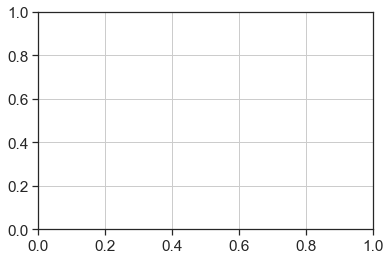

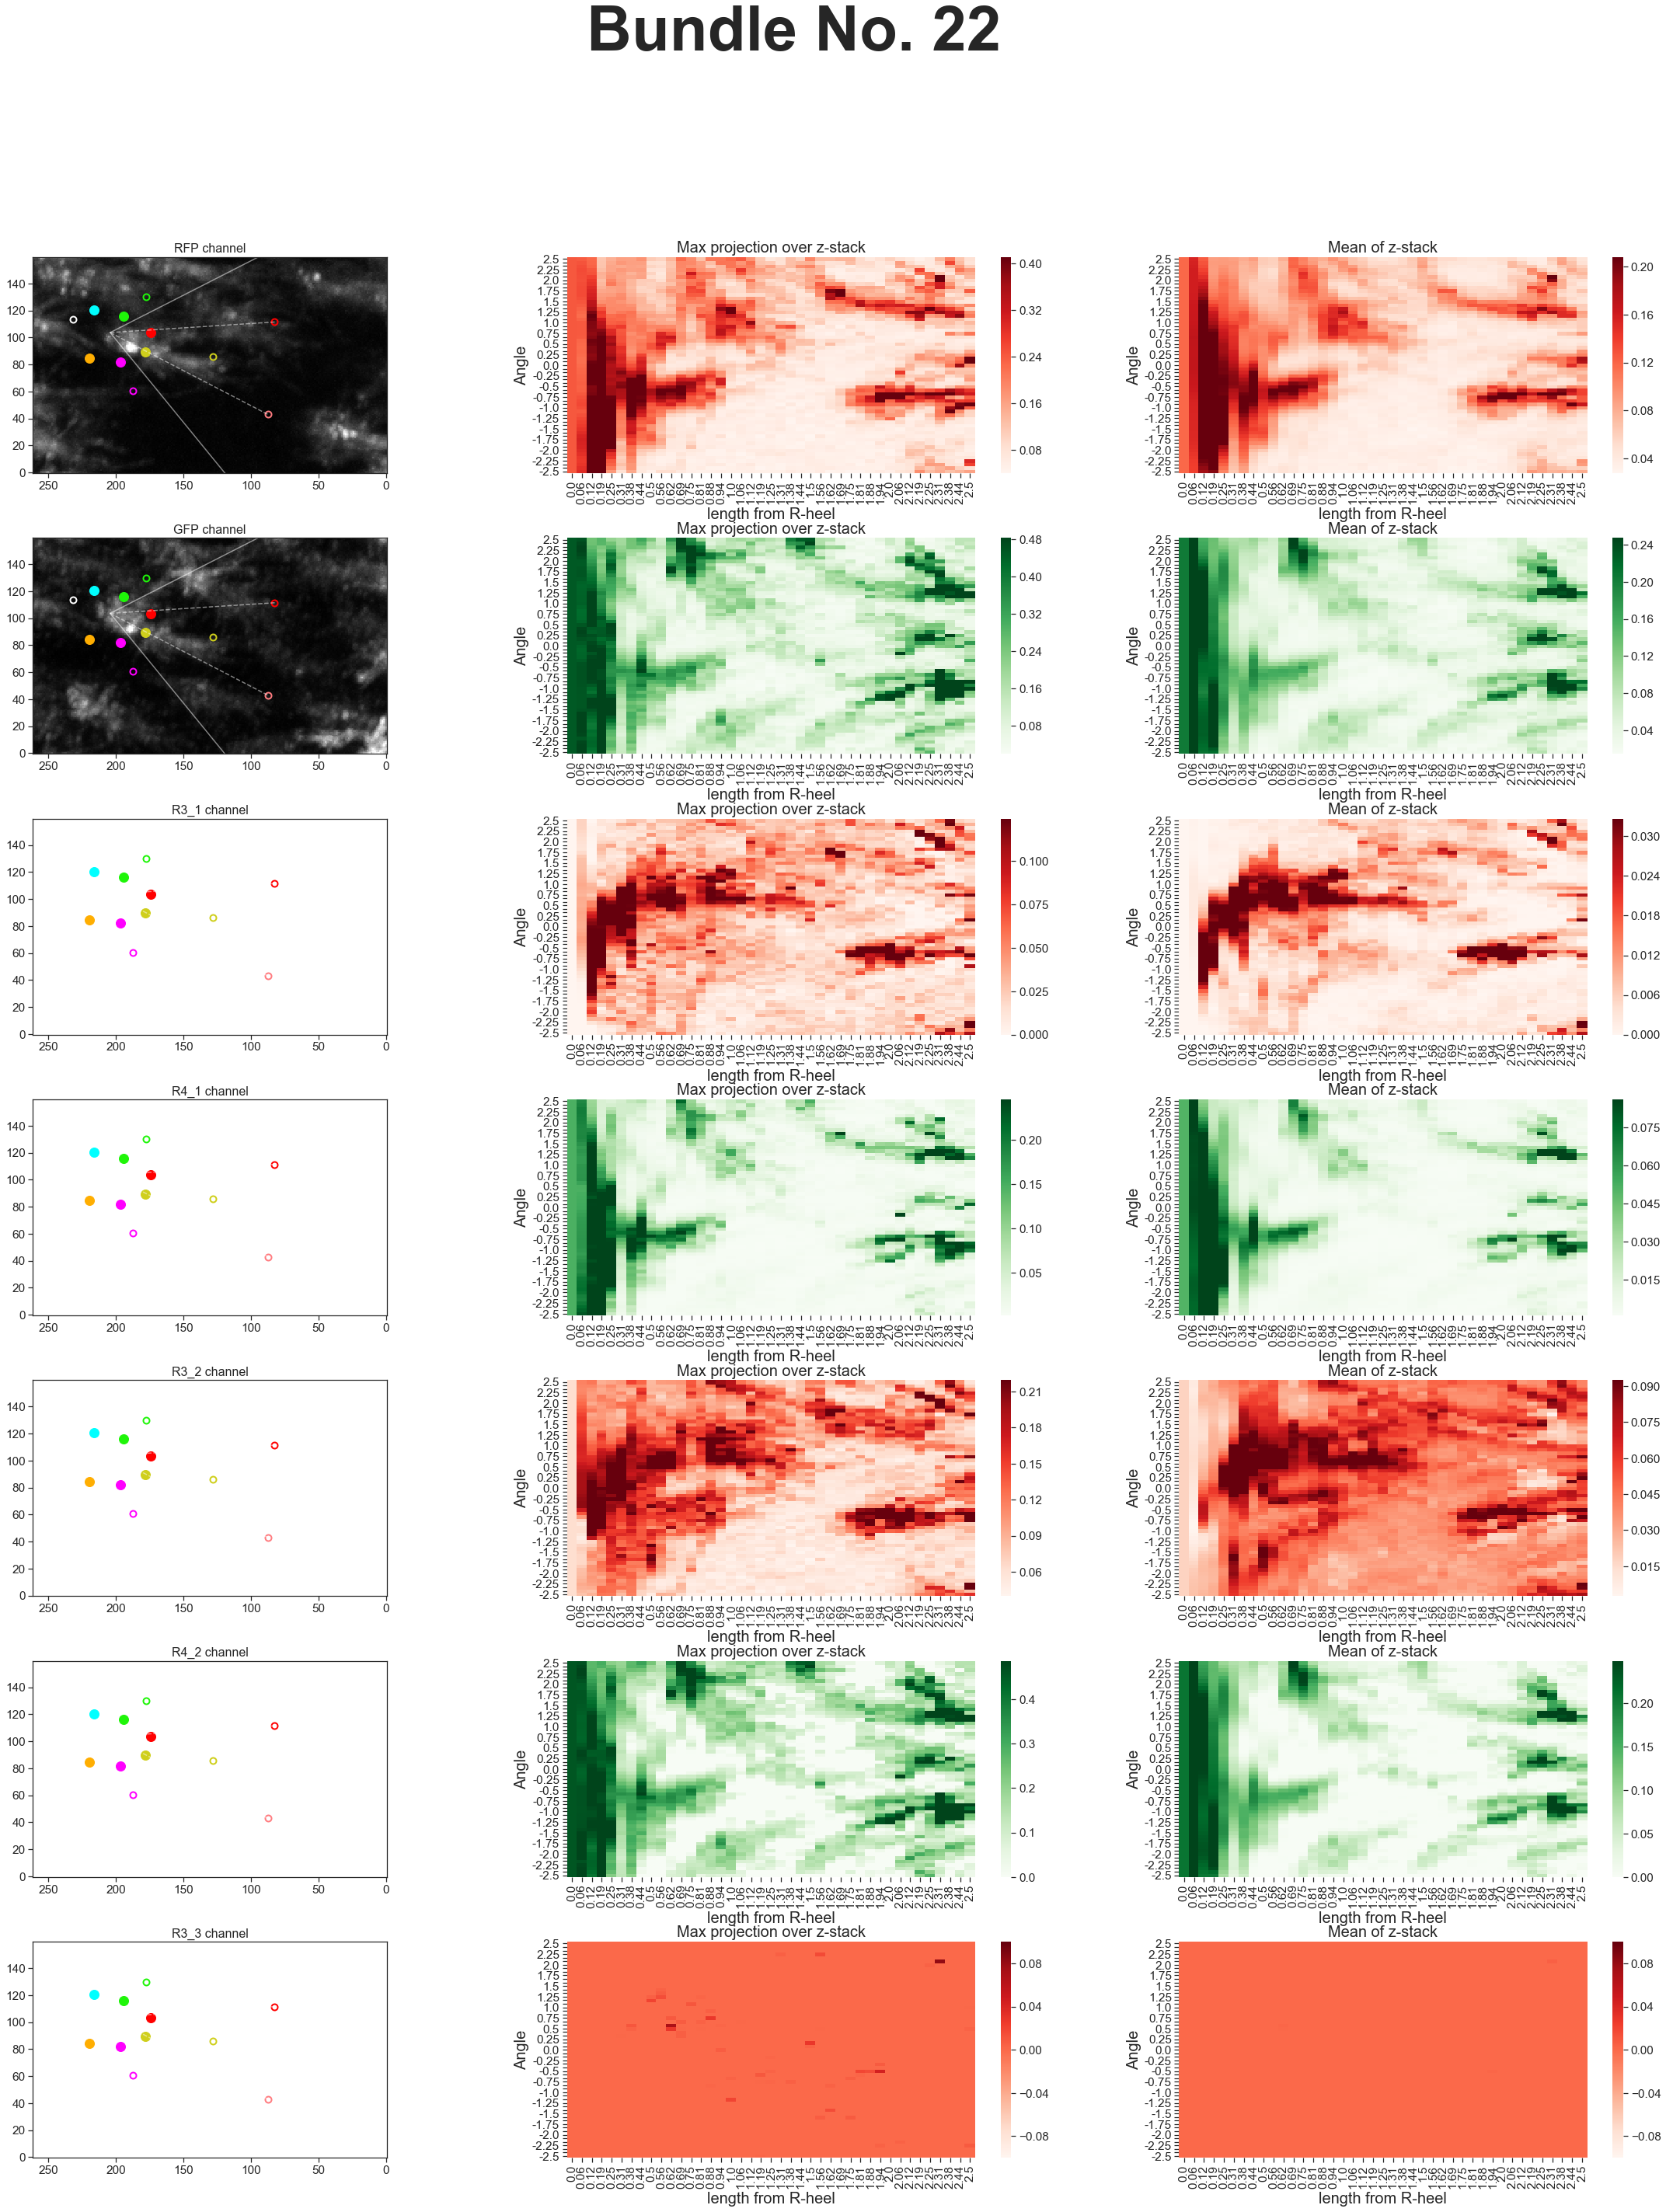

NameError: name 'radiusExpanseRatio' is not defined

In [72]:
### plotting
sns.set_style("darkgrid")
for ind in [5]:
    bundle_No = list(annot_bundles_df.index)[ind]
    R_Z = int(bundles_df.loc[bundle_No,'coord_Z_R' + str(3)]) - 1
    print("Bundle No: ", bundle_No)
    #     DV = bundles_df.loc[bundle_No, 'Orientation_DV']
    #     AP = bundles_df.loc[bundle_No, 'Orientation_AP']

    ### targets info
    indTs, coordTs = my_help.getTargetCoords(bundle_No, bundles_df, target_index_match)
    coord_Center = my_help.getBundleCenter(bundle_No, bundles_df)
    coordR4s = my_help.getRxCoords(bundle_No, bundles_df, indTs, 4)
    coordR3s = my_help.getRxCoords(bundle_No, bundles_df, indTs, 3)
    coordRs = np.concatenate((coordR4s, coordR3s))

    ### plotting heatmap
    for centertype in [0]:
        for slicetype in [0]:
            pp_i = params[ind]
            rel_points_i = rel_points[ind, :]
            
            matrix = my_help.delete_zero_columns(intensity_matrix[ind, :, :, :, :], -100, 3)
#             matrix = IntensityMatrix[ind, centertype, slicetype, :, :, :, :]
    
            plt.ioff()
            img_name = image_list[i_image]
            ori_X = np.round(np.linspace(0, radius_expanse_ratio[centertype], matrix.shape[2]), 2)
            tickParams = [2, 1, ori_X, 21] ### tickTypeX, tickTypeY, tickArg2_X, tickArg2_Y
            figParams = [centertype, pp_i, figOutPrefix, 'abc', img_name, slicetype, radius_expanse_ratio[centertype]]
            for thrFunction in [0]: # different thresholding methods
                if(thrFunction == 0):
                    thrs = np.zeros((7))
                elif(thrFunction == 1):
                    thrs = thr_otsu
                #     elif(thrFunction == 2):
                #         thrs = thr_li
                plotOptions = [True, True, False, True, False, thrs, thrFunction, num_norm_channels] ### isPlotLine, isLabelOff, isSave, isTrueXTick, isOriTick, thrFunction            
                fig = my_plot.plotBundleVsMatrix_all(bundle_No, bundles_df, image_norm, matrix, figParams, tickParams, plotOptions, matching_info)
                #                 plt.close(fig)
                plt.show()
                
            # plotting: polar
            figParams = pp_i, figOutPrefix, img_name, radiusExpanseRatio[centertype], centertype, slicetype
            plotOptions = [True, False] # isLabelOff, isSave
            for channelNo in range(num_norm_channels):
                analysis_params = [analysisParams[0], analysisParams[1], analysisParams[2], analysisParams[3], analysisParams[4][centertype]]
                fig = my_plot.plotPolar(bundle_No, bundles_df, image_norm, analysis_params, channelNo, matrix, figParams, plotOptions, matching_info, rel_points[slicetype, centertype, ind, :])
        #         plt.close(fig)
                plt.show()

In [ ]:
import Data_quantification_function_plotting11 as my_plot

In [ ]:
### Save matrixes and parameters

In [ ]:
categoryID = annot_bundles_df.iloc[0]['CategoryID']
sampleID = annot_bundles_df.iloc[0]['SampleID']
regionID = annot_bundles_df.iloc[0]['RegionID']

In [ ]:
outputData = {
    'categoryID' : categoryID,
    'sampleID' : sampleID,
    'regionID':regionID,
    'sliceType':slicetype,
    'centerType':centertype,
    'intensityMatrix':IntensityMatrix,
    'parameter':params,
    'relativePositions':rel_points
}

In [ ]:
now = datetime.datetime.now()
date_info = str(now.year)+str(now.month)+str(now.day)+str(now.hour)+str(now.minute)
outputname = f'{categoryID}_sample{sampleID}_region{regionID}_slice{slicetype}_center{centertype}_v{date_info}.pickle'

In [ ]:
outputDir = os.path.join(dataOutPrefix)
my_help.check_dir(outputDir)
outputDir = os.path.join(outputDir,categoryID)
my_help.check_dir(outputDir)
# outputname = categoryID + '_sample' + str(sampleID) + '_region' + str(regionID) +  + '.pickle'
outputname = os.path.join(outputDir, outputname)
pickle_out = open(outputname,"wb")
pickle.dump(outputData, pickle_out)
pickle_out.close()